In [2]:
from mcmc import mcmc_run, slab_energy, get_adsorption_coords

from ase.calculators.eam import EAM
from ase.calculators.lammpsrun import LAMMPS
from ase.io import read
from catkit.gen.adsorption import get_adsorption_sites

import catkit
import os
import numpy as np

import sys
sys.path.append("/home/dux/")
from htvs.djangochem.pgmols.utils import surfaces

In [3]:
# use LAMMPS
parameters = {
    'pair_style': 'tersoff',
    'pair_coeff': ['* * Si.tersoff Si']
}

potential_file = os.path.join(os.environ["LAMMPS_POTENTIALS"], 'Si.tersoff')
lammps_calc = LAMMPS(files=[potential_file], keep_tmp_files=False, keep_alive=False, tmp_dir="/home/dux/surface_sampling/tmp_files")
lammps_calc.set(**parameters)

# Au from standard cell
atoms = read('Si_mp-149_conventional_standard.cif')
slab, surface_atoms = surfaces.surface_from_bulk(atoms, [1,1,1], size=[7,7])
slab.write('Si_111_pristine_slab.cif')

slab.calc = lammps_calc
print(f"pristine slab energy is {slab_energy(slab)}")

coords, connectivity, sym_idx = get_adsorption_sites(slab, symmetry_reduced=False)

/home/dux/.local/lib/python3.9/site-packages/catkit/gen/surface.py:334: UserWarning: Your slab has no bulk atoms and may be too thin to identify surface atoms correctly. This may cause surface adsorption site identification to fail.
  warnings.warn(
/home/dux/miniconda3/envs/mlenv/lib/python3.9/site-packages/ase/calculators/lammpsrun.py:379: UserWarning: semi-periodic ASE cell detected - translation to proper LAMMPS input cell might fail
  warnings.warn(


pristine slab energy is -836.8837152884988


/home/dux/.local/lib/python3.9/site-packages/catkit/gen/adsorption.py:60: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.r1_topology = np.array(self.r1_topology)
/home/dux/.local/lib/python3.9/site-packages/catkit/gen/adsorption.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.r2_topology = np.array(self.r2_topology)


In [4]:
element = 'Si'
ads = catkit.gratoms.Gratoms(element)

In [4]:
num_runs = 100
history, energy_hist, frac_accept_hist, adsorption_count_hist = mcmc_run(num_runs=num_runs, temp=1, pot=0, alpha=0.99, slab=slab, calc=lammps_calc, element=element)

INFO:Running with num_runs = 100, temp = 1, pot = 0, alpha = 0.99


there are 196 atoms 
using slab calc <ase.calculators.lammpsrun.LAMMPS object at 0x7f3dac6cf220>


INFO:In pristine slab, there are a total of 392 sites
INFO:running for 392 iterations per run over a total of 100 runs
INFO:adsorbate is Si
INFO:In sweep 1 out of 100
INFO:In sweep 2 out of 100
INFO:In sweep 3 out of 100
INFO:In sweep 4 out of 100
INFO:In sweep 5 out of 100
INFO:In sweep 6 out of 100
INFO:In sweep 7 out of 100
INFO:In sweep 8 out of 100
INFO:In sweep 9 out of 100
INFO:In sweep 10 out of 100
INFO:In sweep 11 out of 100
INFO:In sweep 12 out of 100
INFO:In sweep 13 out of 100
INFO:In sweep 14 out of 100
INFO:In sweep 15 out of 100
INFO:In sweep 16 out of 100
INFO:In sweep 17 out of 100
INFO:In sweep 18 out of 100
INFO:In sweep 19 out of 100
INFO:In sweep 20 out of 100
INFO:In sweep 21 out of 100
INFO:In sweep 22 out of 100
INFO:In sweep 23 out of 100
INFO:In sweep 24 out of 100
INFO:In sweep 25 out of 100
INFO:In sweep 26 out of 100
INFO:In sweep 27 out of 100
INFO:In sweep 28 out of 100
INFO:In sweep 29 out of 100
INFO:In sweep 30 out of 100
INFO:In sweep 31 out of 100
I

Time taken = 1013.537432400044 seconds


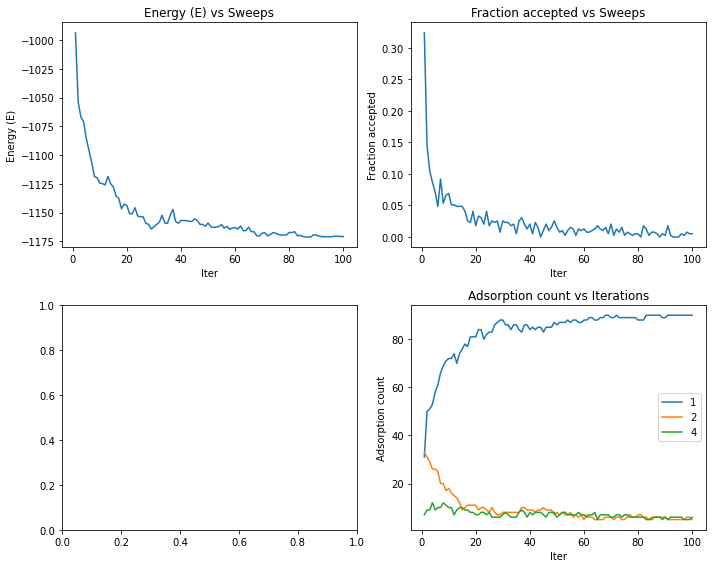

In [5]:
import matplotlib.pyplot as plt
runs = range(1, num_runs+1)
# do the plots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0, 0].plot(runs, energy_hist)
ax[0, 0].set_xlabel("Iter")
ax[0, 0].set_ylabel("Energy (E)")
ax[0, 0].set_title("Energy (E) vs Sweeps")

ax[0, 1].plot(runs, frac_accept_hist)
ax[0, 1].set_xlabel("Iter")
ax[0, 1].set_ylabel("Fraction accepted")
ax[0, 1].set_title("Fraction accepted vs Sweeps")

ax[1, 1].plot(runs, np.array(list(adsorption_count_hist.values())).T)
ax[1, 1].set_xlabel("Iter")
ax[1, 1].set_ylabel("Adsorption count")
ax[1, 1].legend(adsorption_count_hist.keys())
ax[1, 1].set_title("Adsorption count vs Iterations")

fig.show()
fig.tight_layout()

High temperature run

In [5]:
slab, surface_atoms = surfaces.surface_from_bulk(atoms, [1,1,1], size=[7,7])
num_runs = 100
history, energy_hist, frac_accept_hist, adsorption_count_hist = mcmc_run(num_runs=num_runs, temp=1, pot=0, alpha=1, slab=slab, calc=lammps_calc, element=element)

INFO:Running with num_runs = 100, temp = 1, pot = 0, alpha = 1


there are 196 atoms 
using slab calc <ase.calculators.lammpsrun.LAMMPS object at 0x7f49a3f1f0d0>


INFO:In pristine slab, there are a total of 392 sites
INFO:running for 392 iterations per run over a total of 100 runs
INFO:adsorbate is Si
INFO:In sweep 1 out of 100
INFO:In sweep 2 out of 100
INFO:In sweep 3 out of 100
INFO:In sweep 4 out of 100
INFO:In sweep 5 out of 100
INFO:In sweep 6 out of 100
INFO:In sweep 7 out of 100
INFO:In sweep 8 out of 100
INFO:In sweep 9 out of 100
INFO:In sweep 10 out of 100
INFO:In sweep 11 out of 100
INFO:In sweep 12 out of 100
INFO:In sweep 13 out of 100
INFO:In sweep 14 out of 100
INFO:In sweep 15 out of 100
INFO:In sweep 16 out of 100
INFO:In sweep 17 out of 100
INFO:In sweep 18 out of 100
INFO:In sweep 19 out of 100
INFO:In sweep 20 out of 100
INFO:In sweep 21 out of 100
INFO:In sweep 22 out of 100
INFO:In sweep 23 out of 100
INFO:In sweep 24 out of 100
INFO:In sweep 25 out of 100
INFO:In sweep 26 out of 100
INFO:In sweep 27 out of 100
INFO:In sweep 28 out of 100
INFO:In sweep 29 out of 100
INFO:In sweep 30 out of 100
INFO:In sweep 31 out of 100
I

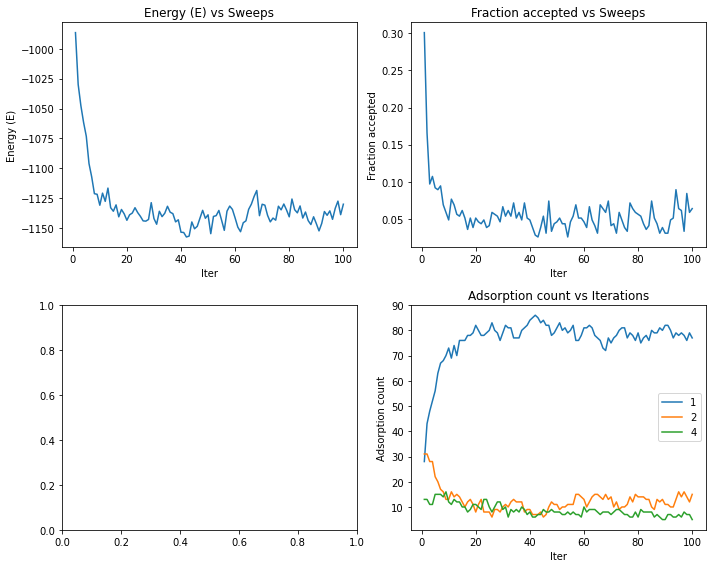

In [6]:
import matplotlib.pyplot as plt
runs = range(1, num_runs+1)
# do the plots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0, 0].plot(runs, energy_hist)
ax[0, 0].set_xlabel("Iter")
ax[0, 0].set_ylabel("Energy (E)")
ax[0, 0].set_title("Energy (E) vs Sweeps")

ax[0, 1].plot(runs, frac_accept_hist)
ax[0, 1].set_xlabel("Iter")
ax[0, 1].set_ylabel("Fraction accepted")
ax[0, 1].set_title("Fraction accepted vs Sweeps")

ax[1, 1].plot(runs, np.array(list(adsorption_count_hist.values())).T)
ax[1, 1].set_xlabel("Iter")
ax[1, 1].set_ylabel("Adsorption count")
ax[1, 1].legend(adsorption_count_hist.keys())
ax[1, 1].set_title("Adsorption count vs Iterations")

fig.show()
fig.tight_layout()

In [12]:
from time import perf_counter

chem_pots = np.linspace(-4, 0, 5)
# chem_pots = [0] # do just one

element = 'Si'
ads = catkit.gratoms.Gratoms(element)

num_runs = 100
all_energy_hist = np.random.rand(len(chem_pots), num_runs)
all_frac_accept_hist = np.random.rand(len(chem_pots), num_runs)
all_top_count_hist = np.random.rand(len(chem_pots), num_runs)
all_bridge_count_hist = np.random.rand(len(chem_pots), num_runs)
all_hollow_count_hist = np.random.rand(len(chem_pots), num_runs)

for i, chem_pot in enumerate(chem_pots):
    start = perf_counter()
    slab, surface_atoms = surfaces.surface_from_bulk(atoms, [1,1,1], size=[7,7])
    history, energy_hist, frac_accept_hist, adsorption_count_hist = mcmc_run(num_runs=num_runs, temp=1, pot=chem_pot, alpha=1, slab=slab, calc=lammps_calc, element=element)
    stop = perf_counter()
    print(f"Time taken = {stop - start} seconds")
    all_energy_hist[i] = energy_hist
    all_frac_accept_hist[i] = frac_accept_hist
    all_top_count_hist[i] = adsorption_count_hist[1]
    all_bridge_count_hist[i] = adsorption_count_hist[2]
    all_hollow_count_hist[i] = adsorption_count_hist[4]

/home/dux/.local/lib/python3.9/site-packages/catkit/gen/surface.py:334: UserWarning: Your slab has no bulk atoms and may be too thin to identify surface atoms correctly. This may cause surface adsorption site identification to fail.
  warnings.warn(
INFO:Running with num_runs = 100, temp = 1, pot = -4.0, alpha = 1


there are 196 atoms 
using slab calc <ase.calculators.lammpsrun.LAMMPS object at 0x7f49a3f1f0d0>


/home/dux/.local/lib/python3.9/site-packages/catkit/gen/adsorption.py:60: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.r1_topology = np.array(self.r1_topology)
/home/dux/.local/lib/python3.9/site-packages/catkit/gen/adsorption.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.r2_topology = np.array(self.r2_topology)
INFO:In pristine slab, there are a total of 392 sites
/home/dux/miniconda3/envs/mlenv/lib/python3.9/site-packages/ase/calculators/lammpsrun.py:379: UserWarning: semi-periodic ASE cell detected - translation to proper LAMMPS 

Time taken = 947.1650479009841 seconds


INFO:Running with num_runs = 100, temp = 1, pot = -3.0, alpha = 1


there are 196 atoms 
using slab calc <ase.calculators.lammpsrun.LAMMPS object at 0x7f49a3f1f0d0>


INFO:In pristine slab, there are a total of 392 sites
INFO:running for 392 iterations per run over a total of 100 runs
INFO:adsorbate is Si
INFO:In sweep 1 out of 100
INFO:In sweep 2 out of 100
INFO:In sweep 3 out of 100
INFO:In sweep 4 out of 100
INFO:In sweep 5 out of 100
INFO:In sweep 6 out of 100
INFO:In sweep 7 out of 100
INFO:In sweep 8 out of 100
INFO:In sweep 9 out of 100
INFO:In sweep 10 out of 100
INFO:In sweep 11 out of 100
INFO:In sweep 12 out of 100
INFO:In sweep 13 out of 100
INFO:In sweep 14 out of 100
INFO:In sweep 15 out of 100
INFO:In sweep 16 out of 100
INFO:In sweep 17 out of 100
INFO:In sweep 18 out of 100
INFO:In sweep 19 out of 100
INFO:In sweep 20 out of 100
INFO:In sweep 21 out of 100
INFO:In sweep 22 out of 100
INFO:In sweep 23 out of 100
INFO:In sweep 24 out of 100
INFO:In sweep 25 out of 100
INFO:In sweep 26 out of 100
INFO:In sweep 27 out of 100
INFO:In sweep 28 out of 100
INFO:In sweep 29 out of 100
INFO:In sweep 30 out of 100
INFO:In sweep 31 out of 100
I

Time taken = 1058.8583010700531 seconds


INFO:Running with num_runs = 100, temp = 1, pot = -2.0, alpha = 1


there are 196 atoms 
using slab calc <ase.calculators.lammpsrun.LAMMPS object at 0x7f49a3f1f0d0>


INFO:In pristine slab, there are a total of 392 sites
INFO:running for 392 iterations per run over a total of 100 runs
INFO:adsorbate is Si
INFO:In sweep 1 out of 100
INFO:In sweep 2 out of 100
INFO:In sweep 3 out of 100
INFO:In sweep 4 out of 100
INFO:In sweep 5 out of 100
INFO:In sweep 6 out of 100
INFO:In sweep 7 out of 100
INFO:In sweep 8 out of 100
INFO:In sweep 9 out of 100
INFO:In sweep 10 out of 100
INFO:In sweep 11 out of 100
INFO:In sweep 12 out of 100
INFO:In sweep 13 out of 100
INFO:In sweep 14 out of 100
INFO:In sweep 15 out of 100
INFO:In sweep 16 out of 100
INFO:In sweep 17 out of 100
INFO:In sweep 18 out of 100
INFO:In sweep 19 out of 100
INFO:In sweep 20 out of 100
INFO:In sweep 21 out of 100
INFO:In sweep 22 out of 100
INFO:In sweep 23 out of 100
INFO:In sweep 24 out of 100
INFO:In sweep 25 out of 100
INFO:In sweep 26 out of 100
INFO:In sweep 27 out of 100
INFO:In sweep 28 out of 100
INFO:In sweep 29 out of 100
INFO:In sweep 30 out of 100
INFO:In sweep 31 out of 100
I

Time taken = 1220.707220912911 seconds


INFO:Running with num_runs = 100, temp = 1, pot = -1.0, alpha = 1


there are 196 atoms 
using slab calc <ase.calculators.lammpsrun.LAMMPS object at 0x7f49a3f1f0d0>


INFO:In pristine slab, there are a total of 392 sites
INFO:running for 392 iterations per run over a total of 100 runs
INFO:adsorbate is Si
INFO:In sweep 1 out of 100
INFO:In sweep 2 out of 100
INFO:In sweep 3 out of 100
INFO:In sweep 4 out of 100
INFO:In sweep 5 out of 100
INFO:In sweep 6 out of 100
INFO:In sweep 7 out of 100
INFO:In sweep 8 out of 100
INFO:In sweep 9 out of 100
INFO:In sweep 10 out of 100
INFO:In sweep 11 out of 100
INFO:In sweep 12 out of 100
INFO:In sweep 13 out of 100
INFO:In sweep 14 out of 100
INFO:In sweep 15 out of 100
INFO:In sweep 16 out of 100
INFO:In sweep 17 out of 100
INFO:In sweep 18 out of 100
INFO:In sweep 19 out of 100
INFO:In sweep 20 out of 100
INFO:In sweep 21 out of 100
INFO:In sweep 22 out of 100
INFO:In sweep 23 out of 100
INFO:In sweep 24 out of 100
INFO:In sweep 25 out of 100
INFO:In sweep 26 out of 100
INFO:In sweep 27 out of 100
INFO:In sweep 28 out of 100
INFO:In sweep 29 out of 100
INFO:In sweep 30 out of 100
INFO:In sweep 31 out of 100
I

Time taken = 1082.0714231529273 seconds


INFO:Running with num_runs = 100, temp = 1, pot = 0.0, alpha = 1


there are 196 atoms 
using slab calc <ase.calculators.lammpsrun.LAMMPS object at 0x7f49a3f1f0d0>


INFO:In pristine slab, there are a total of 392 sites
INFO:running for 392 iterations per run over a total of 100 runs
INFO:adsorbate is Si
INFO:In sweep 1 out of 100
INFO:In sweep 2 out of 100
INFO:In sweep 3 out of 100
INFO:In sweep 4 out of 100
INFO:In sweep 5 out of 100
INFO:In sweep 6 out of 100
INFO:In sweep 7 out of 100
INFO:In sweep 8 out of 100
INFO:In sweep 9 out of 100
INFO:In sweep 10 out of 100
INFO:In sweep 11 out of 100
INFO:In sweep 12 out of 100
INFO:In sweep 13 out of 100
INFO:In sweep 14 out of 100
INFO:In sweep 15 out of 100
INFO:In sweep 16 out of 100
INFO:In sweep 17 out of 100
INFO:In sweep 18 out of 100
INFO:In sweep 19 out of 100
INFO:In sweep 20 out of 100
INFO:In sweep 21 out of 100
INFO:In sweep 22 out of 100
INFO:In sweep 23 out of 100
INFO:In sweep 24 out of 100
INFO:In sweep 25 out of 100
INFO:In sweep 26 out of 100
INFO:In sweep 27 out of 100
INFO:In sweep 28 out of 100
INFO:In sweep 29 out of 100
INFO:In sweep 30 out of 100
INFO:In sweep 31 out of 100
I

Time taken = 1076.5543499880005 seconds


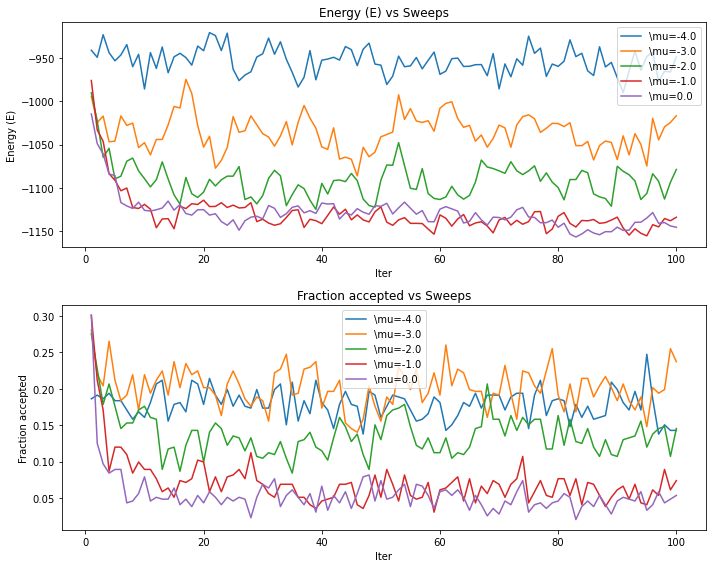

In [13]:
import matplotlib.pyplot as plt
# do the plots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
runs = np.arange(1, num_runs+1)
legends = [f"\mu={mu}" for mu in chem_pots]
ax[0].plot(runs, all_energy_hist.T)
ax[0].set_xlabel("Iter")
ax[0].set_ylabel("Energy (E)")
ax[0].set_title("Energy (E) vs Sweeps")
ax[0].legend(legends)

ax[1].plot(runs, all_frac_accept_hist.T)
ax[1].set_xlabel("Iter")
ax[1].set_ylabel("Fraction accepted")
ax[1].set_title("Fraction accepted vs Sweeps")
ax[1].legend(legends)

fig.tight_layout()
fig.show()
# fig.savefig("energy_per_spin")
# fig.savefig("sgmc_anneal_alpha_0.9_repeat1.png")

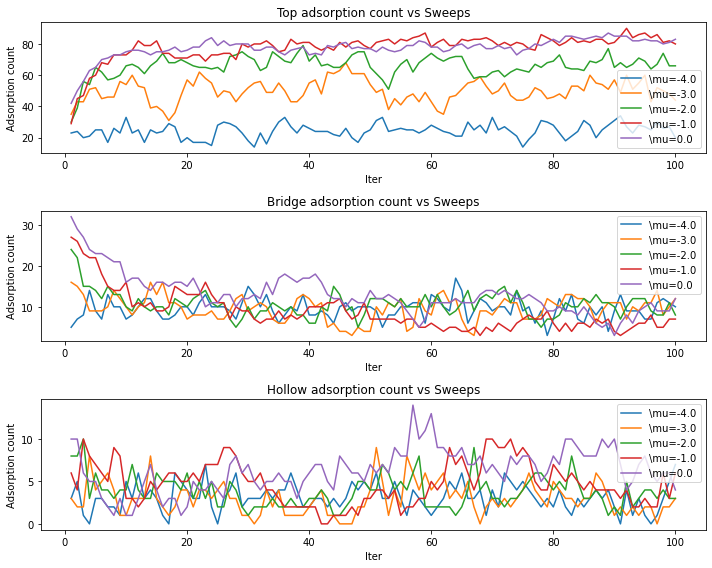

In [14]:
import matplotlib.pyplot as plt

# do the plots
fig, ax = plt.subplots(3, 1, figsize=(10, 8))
runs = np.arange(1, num_runs+1)
legends = [f"\mu={mu}" for mu in chem_pots]

ax[0].plot(runs, all_top_count_hist.T)
ax[0].set_xlabel("Iter")
ax[0].set_ylabel("Adsorption count")
ax[0].set_title("Top adsorption count vs Sweeps")
ax[0].legend(legends)

ax[1].plot(runs, all_bridge_count_hist.T)
ax[1].set_xlabel("Iter")
ax[1].set_ylabel("Adsorption count")
ax[1].set_title("Bridge adsorption count vs Sweeps")
ax[1].legend(legends)

ax[2].plot(runs, all_hollow_count_hist.T)
ax[2].set_xlabel("Iter")
ax[2].set_ylabel("Adsorption count")
ax[2].set_title("Hollow adsorption count vs Sweeps")
ax[2].legend(legends)

fig.show()
fig.tight_layout()

Fine grain work

In [23]:
from time import perf_counter

chem_pots = np.linspace(-4.0, -3.75, 10)
# chem_pots = [0] # do just one

# use LAMMPS
parameters = {
    'pair_style': 'eam',
    'pair_coeff': ['* * Au_u3.eam']
}

potential_file = os.path.join(os.environ["LAMMPS_POTENTIALS"], 'Au_u3.eam')
lammps_calc = LAMMPS(files=[potential_file], keep_tmp_files=False, keep_alive=False, tmp_dir="/home/dux/surface_sampling/tmp_files")
lammps_calc.set(**parameters)

# Au from standard cell
atoms = read('Au_mp-81_conventional_standard.cif')
slab, surface_atoms = surfaces.surface_from_bulk(atoms, [1,1,0], size=[4,4])
slab.write('Au_110_pristine_slab.cif')

slab.calc = lammps_calc

num_runs = 100
all_energy_hist = np.random.rand(len(chem_pots), num_runs)
all_frac_accept_hist = np.random.rand(len(chem_pots), num_runs)
all_top_count_hist = np.random.rand(len(chem_pots), num_runs)
all_bridge_count_hist = np.random.rand(len(chem_pots), num_runs)
all_hollow_count_hist = np.random.rand(len(chem_pots), num_runs)

element = 'Au'

for i, chem_pot in enumerate(chem_pots):
    start = perf_counter()
    # reset every 8 iter
    slab, surface_atoms = surfaces.surface_from_bulk(atoms, [1,1,0], size=[4,4])

    history, energy_hist, frac_accept_hist, adsorption_count_hist = mcmc_run(num_runs=num_runs, temp=1, pot=chem_pot, alpha=0.98, slab=slab, calc=lammps_calc, element=element)
    stop = perf_counter()
    print(f"Time taken = {stop - start} seconds")
    all_energy_hist[i] = energy_hist
    all_frac_accept_hist[i] = frac_accept_hist
    all_top_count_hist[i] = adsorption_count_hist[1]
    all_bridge_count_hist[i] = adsorption_count_hist[2]
    all_hollow_count_hist[i] = adsorption_count_hist[4]

/home/dux/miniconda3/envs/mlenv/lib/python3.9/site-packages/catkit/gen/surface.py:334: UserWarning: Your slab has no bulk atoms and may be too thin to identify surface atoms correctly. This may cause surface adsorption site identification to fail.
  warnings.warn(
INFO:Running with num_runs = 100, temp = 1, pot = -4.0, alpha = 0.98
/home/dux/miniconda3/envs/mlenv/lib/python3.9/site-packages/catkit/gen/adsorption.py:60: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.r1_topology = np.array(self.r1_topology)
/home/dux/miniconda3/envs/mlenv/lib/python3.9/site-packages/catkit/gen/adsorption.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depr

using slab calc <ase.calculators.lammpsrun.LAMMPS object at 0x7f9b88165820>


INFO:In pristine slab, there are a total of 192 sites
/home/dux/miniconda3/envs/mlenv/lib/python3.9/site-packages/ase/calculators/lammpsrun.py:379: UserWarning: semi-periodic ASE cell detected - translation to proper LAMMPS input cell might fail
  warnings.warn(
INFO:running for 192 iterations per run over a total of 100 runs
INFO:In sweep 1 out of 100
INFO:In sweep 2 out of 100
INFO:In sweep 3 out of 100
INFO:In sweep 4 out of 100
INFO:In sweep 5 out of 100
INFO:In sweep 6 out of 100
INFO:In sweep 7 out of 100
INFO:In sweep 8 out of 100
INFO:In sweep 9 out of 100
INFO:In sweep 10 out of 100
INFO:In sweep 11 out of 100
INFO:In sweep 12 out of 100
INFO:In sweep 13 out of 100
INFO:In sweep 14 out of 100
INFO:In sweep 15 out of 100
INFO:In sweep 16 out of 100
INFO:In sweep 17 out of 100
INFO:In sweep 18 out of 100
INFO:In sweep 19 out of 100
INFO:In sweep 20 out of 100
INFO:In sweep 21 out of 100
INFO:In sweep 22 out of 100
INFO:In sweep 23 out of 100
INFO:In sweep 24 out of 100
INFO:In s

Time taken = 251.78863098472357 seconds


INFO:Running with num_runs = 100, temp = 1, pot = -3.9722222222222223, alpha = 0.98


using slab calc <ase.calculators.lammpsrun.LAMMPS object at 0x7f9b88165820>


INFO:In pristine slab, there are a total of 192 sites
INFO:running for 192 iterations per run over a total of 100 runs
INFO:In sweep 1 out of 100
INFO:In sweep 2 out of 100
INFO:In sweep 3 out of 100
INFO:In sweep 4 out of 100
INFO:In sweep 5 out of 100
INFO:In sweep 6 out of 100
INFO:In sweep 7 out of 100
INFO:In sweep 8 out of 100
INFO:In sweep 9 out of 100
INFO:In sweep 10 out of 100
INFO:In sweep 11 out of 100
INFO:In sweep 12 out of 100
INFO:In sweep 13 out of 100
INFO:In sweep 14 out of 100
INFO:In sweep 15 out of 100
INFO:In sweep 16 out of 100
INFO:In sweep 17 out of 100
INFO:In sweep 18 out of 100
INFO:In sweep 19 out of 100
INFO:In sweep 20 out of 100
INFO:In sweep 21 out of 100
INFO:In sweep 22 out of 100
INFO:In sweep 23 out of 100
INFO:In sweep 24 out of 100
INFO:In sweep 25 out of 100
INFO:In sweep 26 out of 100
INFO:In sweep 27 out of 100
INFO:In sweep 28 out of 100
INFO:In sweep 29 out of 100
INFO:In sweep 30 out of 100
INFO:In sweep 31 out of 100
INFO:In sweep 32 out o

Time taken = 249.44283860176802 seconds


INFO:Running with num_runs = 100, temp = 1, pot = -3.9444444444444446, alpha = 0.98


using slab calc <ase.calculators.lammpsrun.LAMMPS object at 0x7f9b88165820>


INFO:In pristine slab, there are a total of 192 sites
INFO:running for 192 iterations per run over a total of 100 runs
INFO:In sweep 1 out of 100
INFO:In sweep 2 out of 100
INFO:In sweep 3 out of 100
INFO:In sweep 4 out of 100
INFO:In sweep 5 out of 100
INFO:In sweep 6 out of 100
INFO:In sweep 7 out of 100
INFO:In sweep 8 out of 100
INFO:In sweep 9 out of 100
INFO:In sweep 10 out of 100
INFO:In sweep 11 out of 100
INFO:In sweep 12 out of 100
INFO:In sweep 13 out of 100
INFO:In sweep 14 out of 100
INFO:In sweep 15 out of 100
INFO:In sweep 16 out of 100
INFO:In sweep 17 out of 100
INFO:In sweep 18 out of 100
INFO:In sweep 19 out of 100
INFO:In sweep 20 out of 100
INFO:In sweep 21 out of 100
INFO:In sweep 22 out of 100
INFO:In sweep 23 out of 100
INFO:In sweep 24 out of 100
INFO:In sweep 25 out of 100
INFO:In sweep 26 out of 100
INFO:In sweep 27 out of 100
INFO:In sweep 28 out of 100
INFO:In sweep 29 out of 100
INFO:In sweep 30 out of 100
INFO:In sweep 31 out of 100
INFO:In sweep 32 out o

Time taken = 347.56754648685455 seconds


INFO:Running with num_runs = 100, temp = 1, pot = -3.9166666666666665, alpha = 0.98


using slab calc <ase.calculators.lammpsrun.LAMMPS object at 0x7f9b88165820>


INFO:In pristine slab, there are a total of 192 sites
INFO:running for 192 iterations per run over a total of 100 runs
INFO:In sweep 1 out of 100
INFO:In sweep 2 out of 100
INFO:In sweep 3 out of 100
INFO:In sweep 4 out of 100
INFO:In sweep 5 out of 100
INFO:In sweep 6 out of 100
INFO:In sweep 7 out of 100
INFO:In sweep 8 out of 100
INFO:In sweep 9 out of 100
INFO:In sweep 10 out of 100
INFO:In sweep 11 out of 100
INFO:In sweep 12 out of 100
INFO:In sweep 13 out of 100
INFO:In sweep 14 out of 100
INFO:In sweep 15 out of 100
INFO:In sweep 16 out of 100
INFO:In sweep 17 out of 100
INFO:In sweep 18 out of 100
INFO:In sweep 19 out of 100
INFO:In sweep 20 out of 100
INFO:In sweep 21 out of 100
INFO:In sweep 22 out of 100
INFO:In sweep 23 out of 100
INFO:In sweep 24 out of 100
INFO:In sweep 25 out of 100
INFO:In sweep 26 out of 100
INFO:In sweep 27 out of 100
INFO:In sweep 28 out of 100
INFO:In sweep 29 out of 100
INFO:In sweep 30 out of 100
INFO:In sweep 31 out of 100
INFO:In sweep 32 out o

Time taken = 384.42916913330555 seconds


INFO:Running with num_runs = 100, temp = 1, pot = -3.888888888888889, alpha = 0.98


using slab calc <ase.calculators.lammpsrun.LAMMPS object at 0x7f9b88165820>


INFO:In pristine slab, there are a total of 192 sites
INFO:running for 192 iterations per run over a total of 100 runs
INFO:In sweep 1 out of 100
INFO:In sweep 2 out of 100
INFO:In sweep 3 out of 100
INFO:In sweep 4 out of 100
INFO:In sweep 5 out of 100
INFO:In sweep 6 out of 100
INFO:In sweep 7 out of 100
INFO:In sweep 8 out of 100
INFO:In sweep 9 out of 100
INFO:In sweep 10 out of 100
INFO:In sweep 11 out of 100
INFO:In sweep 12 out of 100
INFO:In sweep 13 out of 100
INFO:In sweep 14 out of 100
INFO:In sweep 15 out of 100
INFO:In sweep 16 out of 100
INFO:In sweep 17 out of 100
INFO:In sweep 18 out of 100
INFO:In sweep 19 out of 100
INFO:In sweep 20 out of 100
INFO:In sweep 21 out of 100
INFO:In sweep 22 out of 100
INFO:In sweep 23 out of 100
INFO:In sweep 24 out of 100
INFO:In sweep 25 out of 100
INFO:In sweep 26 out of 100
INFO:In sweep 27 out of 100
INFO:In sweep 28 out of 100
INFO:In sweep 29 out of 100
INFO:In sweep 30 out of 100
INFO:In sweep 31 out of 100
INFO:In sweep 32 out o

Time taken = 292.34986739605665 seconds


INFO:Running with num_runs = 100, temp = 1, pot = -3.861111111111111, alpha = 0.98


using slab calc <ase.calculators.lammpsrun.LAMMPS object at 0x7f9b88165820>


INFO:In pristine slab, there are a total of 192 sites
INFO:running for 192 iterations per run over a total of 100 runs
INFO:In sweep 1 out of 100
INFO:In sweep 2 out of 100
INFO:In sweep 3 out of 100
INFO:In sweep 4 out of 100
INFO:In sweep 5 out of 100
INFO:In sweep 6 out of 100
INFO:In sweep 7 out of 100
INFO:In sweep 8 out of 100
INFO:In sweep 9 out of 100
INFO:In sweep 10 out of 100
INFO:In sweep 11 out of 100
INFO:In sweep 12 out of 100
INFO:In sweep 13 out of 100
INFO:In sweep 14 out of 100
INFO:In sweep 15 out of 100
INFO:In sweep 16 out of 100
INFO:In sweep 17 out of 100
INFO:In sweep 18 out of 100
INFO:In sweep 19 out of 100
INFO:In sweep 20 out of 100
INFO:In sweep 21 out of 100
INFO:In sweep 22 out of 100
INFO:In sweep 23 out of 100
INFO:In sweep 24 out of 100
INFO:In sweep 25 out of 100
INFO:In sweep 26 out of 100
INFO:In sweep 27 out of 100
INFO:In sweep 28 out of 100
INFO:In sweep 29 out of 100
INFO:In sweep 30 out of 100
INFO:In sweep 31 out of 100
INFO:In sweep 32 out o

Time taken = 248.51398096978664 seconds


INFO:Running with num_runs = 100, temp = 1, pot = -3.8333333333333335, alpha = 0.98


using slab calc <ase.calculators.lammpsrun.LAMMPS object at 0x7f9b88165820>


INFO:In pristine slab, there are a total of 192 sites
INFO:running for 192 iterations per run over a total of 100 runs
INFO:In sweep 1 out of 100
INFO:In sweep 2 out of 100
INFO:In sweep 3 out of 100
INFO:In sweep 4 out of 100
INFO:In sweep 5 out of 100
INFO:In sweep 6 out of 100
INFO:In sweep 7 out of 100
INFO:In sweep 8 out of 100
INFO:In sweep 9 out of 100
INFO:In sweep 10 out of 100
INFO:In sweep 11 out of 100
INFO:In sweep 12 out of 100
INFO:In sweep 13 out of 100
INFO:In sweep 14 out of 100
INFO:In sweep 15 out of 100
INFO:In sweep 16 out of 100
INFO:In sweep 17 out of 100
INFO:In sweep 18 out of 100
INFO:In sweep 19 out of 100
INFO:In sweep 20 out of 100
INFO:In sweep 21 out of 100
INFO:In sweep 22 out of 100
INFO:In sweep 23 out of 100
INFO:In sweep 24 out of 100
INFO:In sweep 25 out of 100
INFO:In sweep 26 out of 100
INFO:In sweep 27 out of 100
INFO:In sweep 28 out of 100
INFO:In sweep 29 out of 100
INFO:In sweep 30 out of 100
INFO:In sweep 31 out of 100
INFO:In sweep 32 out o

Time taken = 256.4304554462433 seconds


INFO:Running with num_runs = 100, temp = 1, pot = -3.8055555555555554, alpha = 0.98


using slab calc <ase.calculators.lammpsrun.LAMMPS object at 0x7f9b88165820>


INFO:In pristine slab, there are a total of 192 sites
INFO:running for 192 iterations per run over a total of 100 runs
INFO:In sweep 1 out of 100
INFO:In sweep 2 out of 100
INFO:In sweep 3 out of 100
INFO:In sweep 4 out of 100
INFO:In sweep 5 out of 100
INFO:In sweep 6 out of 100
INFO:In sweep 7 out of 100
INFO:In sweep 8 out of 100
INFO:In sweep 9 out of 100
INFO:In sweep 10 out of 100
INFO:In sweep 11 out of 100
INFO:In sweep 12 out of 100
INFO:In sweep 13 out of 100
INFO:In sweep 14 out of 100
INFO:In sweep 15 out of 100
INFO:In sweep 16 out of 100
INFO:In sweep 17 out of 100
INFO:In sweep 18 out of 100
INFO:In sweep 19 out of 100
INFO:In sweep 20 out of 100
INFO:In sweep 21 out of 100
INFO:In sweep 22 out of 100
INFO:In sweep 23 out of 100
INFO:In sweep 24 out of 100
INFO:In sweep 25 out of 100
INFO:In sweep 26 out of 100
INFO:In sweep 27 out of 100
INFO:In sweep 28 out of 100
INFO:In sweep 29 out of 100
INFO:In sweep 30 out of 100
INFO:In sweep 31 out of 100
INFO:In sweep 32 out o

Time taken = 255.38466969877481 seconds


INFO:Running with num_runs = 100, temp = 1, pot = -3.7777777777777777, alpha = 0.98


using slab calc <ase.calculators.lammpsrun.LAMMPS object at 0x7f9b88165820>


INFO:In pristine slab, there are a total of 192 sites
INFO:running for 192 iterations per run over a total of 100 runs
INFO:In sweep 1 out of 100
INFO:In sweep 2 out of 100
INFO:In sweep 3 out of 100
INFO:In sweep 4 out of 100
INFO:In sweep 5 out of 100
INFO:In sweep 6 out of 100
INFO:In sweep 7 out of 100
INFO:In sweep 8 out of 100
INFO:In sweep 9 out of 100
INFO:In sweep 10 out of 100
INFO:In sweep 11 out of 100
INFO:In sweep 12 out of 100
INFO:In sweep 13 out of 100
INFO:In sweep 14 out of 100
INFO:In sweep 15 out of 100
INFO:In sweep 16 out of 100
INFO:In sweep 17 out of 100
INFO:In sweep 18 out of 100
INFO:In sweep 19 out of 100
INFO:In sweep 20 out of 100
INFO:In sweep 21 out of 100
INFO:In sweep 22 out of 100
INFO:In sweep 23 out of 100
INFO:In sweep 24 out of 100
INFO:In sweep 25 out of 100
INFO:In sweep 26 out of 100
INFO:In sweep 27 out of 100
INFO:In sweep 28 out of 100
INFO:In sweep 29 out of 100
INFO:In sweep 30 out of 100
INFO:In sweep 31 out of 100
INFO:In sweep 32 out o

Time taken = 256.46831335127354 seconds


INFO:Running with num_runs = 100, temp = 1, pot = -3.75, alpha = 0.98


using slab calc <ase.calculators.lammpsrun.LAMMPS object at 0x7f9b88165820>


INFO:In pristine slab, there are a total of 192 sites
INFO:running for 192 iterations per run over a total of 100 runs
INFO:In sweep 1 out of 100
INFO:In sweep 2 out of 100
INFO:In sweep 3 out of 100
INFO:In sweep 4 out of 100
INFO:In sweep 5 out of 100
INFO:In sweep 6 out of 100
INFO:In sweep 7 out of 100
INFO:In sweep 8 out of 100
INFO:In sweep 9 out of 100
INFO:In sweep 10 out of 100
INFO:In sweep 11 out of 100
INFO:In sweep 12 out of 100
INFO:In sweep 13 out of 100
INFO:In sweep 14 out of 100
INFO:In sweep 15 out of 100
INFO:In sweep 16 out of 100
INFO:In sweep 17 out of 100
INFO:In sweep 18 out of 100
INFO:In sweep 19 out of 100
INFO:In sweep 20 out of 100
INFO:In sweep 21 out of 100
INFO:In sweep 22 out of 100
INFO:In sweep 23 out of 100
INFO:In sweep 24 out of 100
INFO:In sweep 25 out of 100
INFO:In sweep 26 out of 100
INFO:In sweep 27 out of 100
INFO:In sweep 28 out of 100
INFO:In sweep 29 out of 100
INFO:In sweep 30 out of 100
INFO:In sweep 31 out of 100
INFO:In sweep 32 out o

Time taken = 254.23751682043076 seconds


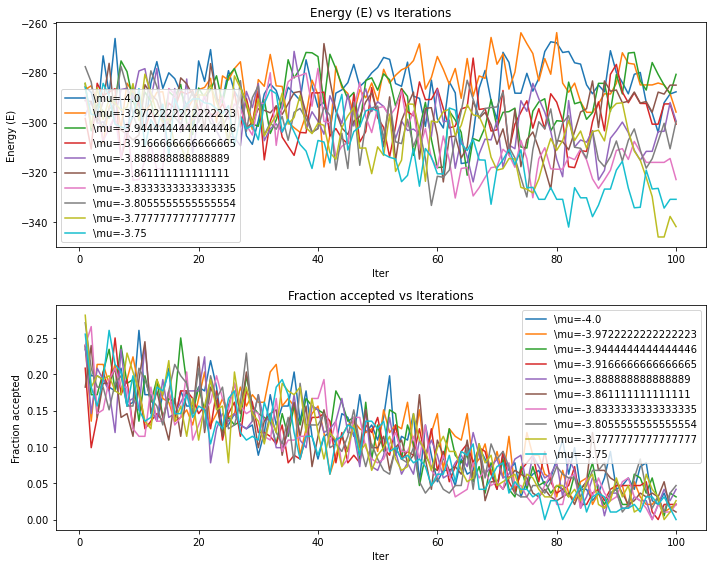

In [24]:
import matplotlib.pyplot as plt
# do the plots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
runs = np.arange(1, num_runs+1)
legends = [f"\mu={mu}" for mu in chem_pots]
ax[0].plot(runs, all_energy_hist.T)
ax[0].set_xlabel("Iter")
ax[0].set_ylabel("Energy (E)")
ax[0].set_title("Energy (E) vs Iterations")
ax[0].legend(legends)

ax[1].plot(runs, all_frac_accept_hist.T)
ax[1].set_xlabel("Iter")
ax[1].set_ylabel("Fraction accepted")
ax[1].set_title("Fraction accepted vs Iterations")
ax[1].legend(legends)

fig.show()
fig.tight_layout()
# fig.savefig("energy_per_spin")
# fig.savefig("sgmc_anneal_alpha_0.9_repeat1.png")

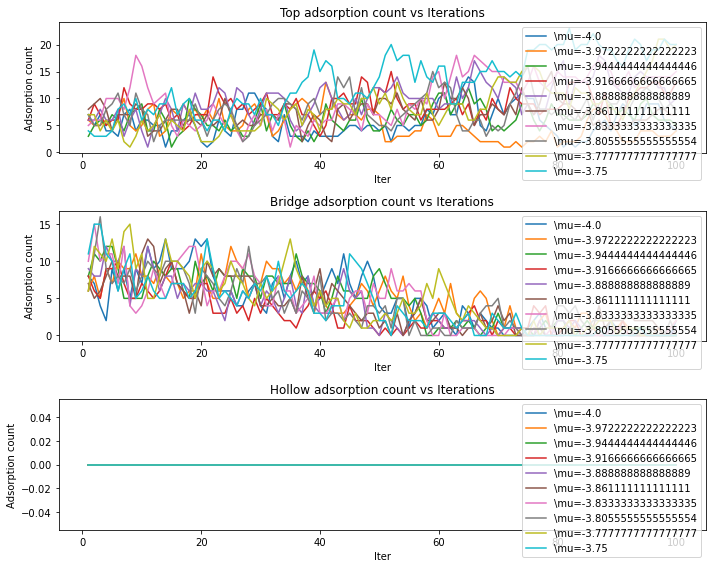

In [25]:
import matplotlib.pyplot as plt

# do the plots
fig, ax = plt.subplots(3, 1, figsize=(10, 8))
runs = np.arange(1, num_runs+1)
legends = [f"\mu={mu}" for mu in chem_pots]

ax[0].plot(runs, all_top_count_hist.T)
ax[0].set_xlabel("Iter")
ax[0].set_ylabel("Adsorption count")
ax[0].set_title("Top adsorption count vs Iterations")
ax[0].legend(legends)

ax[1].plot(runs, all_bridge_count_hist.T)
ax[1].set_xlabel("Iter")
ax[1].set_ylabel("Adsorption count")
ax[1].set_title("Bridge adsorption count vs Iterations")
ax[1].legend(legends)

ax[2].plot(runs, all_hollow_count_hist.T)
ax[2].set_xlabel("Iter")
ax[2].set_ylabel("Adsorption count")
ax[2].set_title("Hollow adsorption count vs Iterations")
ax[2].legend(legends)

fig.show()
fig.tight_layout()